In [1]:
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image

In [2]:
data_path = 'data/'
images = 'images/'

droids_df = pd.read_csv(data_path + 'all.CSV', sep=',', encoding='utf8')
droids_df.columns = ['class','fileName','height','width','xmax','xmin','ymax','ymin']

In [3]:
droids_df

,class,fileName,height,width,xmax,xmin,ymax,ymin
0,bb8,BB-8_1,512,288,208,46,512,15
1,bb8,BB-8_2,432,634,401,196,425,143
2,bb8,BB-8_3,480,480,443,23,480,155
3,bb8,BB-8_4,480,480,480,18,479,1
4,bb8,BB-8_5,332,800,442,332,332,208
...,...,...,...,...,...,...,...,...
197,r2d2,R2-D2_97,306,656,318,198,284,47
198,r2d2,R2-D2_98,381,545,274,4,380,4
199,r2d2,R2-D2_99,617,1084,547,365,447,206
200,r2d2,R2-D2_100,383,900,436,240,382,212


In [4]:
_dir_ = os.listdir(images)
for i in _dir_:
    if i[0:10] == 'background':
        im = Image.open(images + i)
        (width, height) = im.size
        droids_df = droids_df.append([{'class':'background', 'fileName':i[0:-5], 'height' : height, 'width' : width, 'xmax':width-1, 'xmin': 1, 'ymin':1, 'ymax':height-1}], ignore_index=True)

In [5]:
droids_df

,class,fileName,height,width,xmax,xmin,ymax,ymin
0,bb8,BB-8_1,512,288,208,46,512,15
1,bb8,BB-8_2,432,634,401,196,425,143
2,bb8,BB-8_3,480,480,443,23,480,155
3,bb8,BB-8_4,480,480,480,18,479,1
4,bb8,BB-8_5,332,800,442,332,332,208
...,...,...,...,...,...,...,...,...
322,background,background_8,169,298,297,1,168,1
323,background,background_11,183,275,274,1,182,1
324,background,background_6,168,300,299,1,167,1
325,background,background_5,168,300,299,1,167,1


In [6]:
files = list(set(droids_df['fileName'].values))
train, test, _, _ = train_test_split(files, files, test_size=0.2, random_state=6)

def is_train(fileName): return fileName in train

droids_df['is_train'] = droids_df.fileName.apply(is_train)

In [7]:
droids_df.loc[droids_df['class'] == 'bb8', 'category'] = '1'
droids_df.loc[droids_df['class'] == 'r2d2', 'category'] = '2'
droids_df.loc[droids_df['class'] == 'background', 'category'] = '3'

In [8]:
droids_df

,class,fileName,height,width,xmax,xmin,ymax,ymin,is_train,category
0,bb8,BB-8_1,512,288,208,46,512,15,True,1
1,bb8,BB-8_2,432,634,401,196,425,143,True,1
2,bb8,BB-8_3,480,480,443,23,480,155,False,1
3,bb8,BB-8_4,480,480,480,18,479,1,True,1
4,bb8,BB-8_5,332,800,442,332,332,208,False,1
...,...,...,...,...,...,...,...,...,...,...
322,background,background_8,169,298,297,1,168,1,True,3
323,background,background_11,183,275,274,1,182,1,True,3
324,background,background_6,168,300,299,1,167,1,True,3
325,background,background_5,168,300,299,1,167,1,True,3


In [9]:
droids_df.to_pickle(f'{data_path}droids_df.pkl')

In [10]:
def draw_shelf_photo(file):
    file_droids_df = droids_df.loc[droids_df['fileName'] == file]
    coordinates = file_droids_df[['xmin', 'ymin', 'xmax', 'ymax']].values
    im = cv2.imread(f'{images}{file}.jpg')
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)    
    for xmin, ymin, xmax, ymax in coordinates:
        cv2.rectangle(im, (xmin, ymin), (xmax, ymax), (0, 255, 0), 5)
    plt.imshow(im)

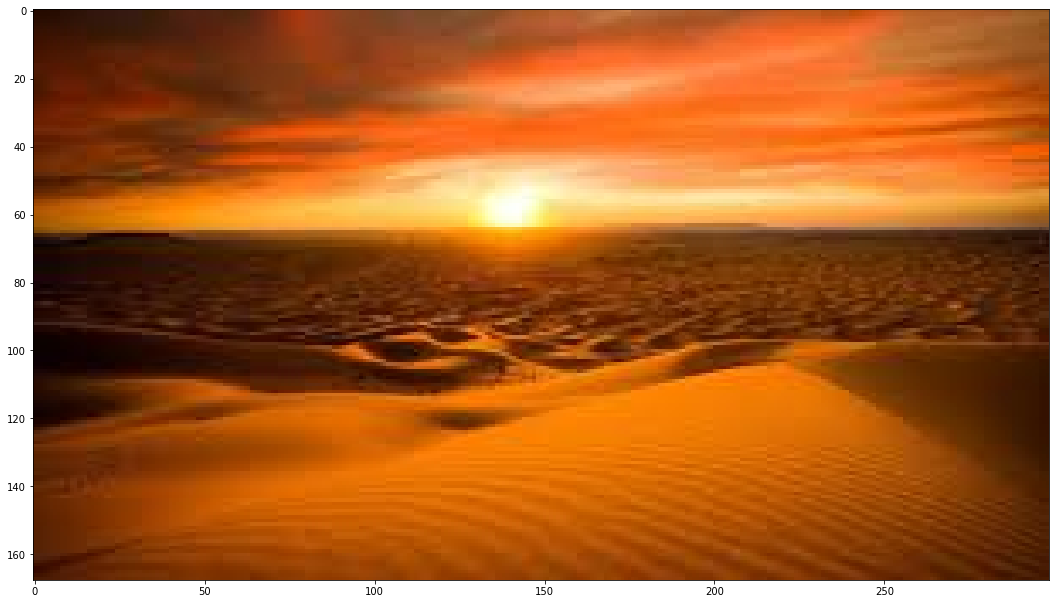

In [11]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
draw_shelf_photo('background_57')